In [1]:
from PIL import Image, ImageDraw
import numpy as np
import math
from scipy import signal, ndimage
import ncc

In [2]:
# Q2

# takes an image and returns a list of images that are scaled by 0.75 to create
# a gaussian pyramid that will stop once the largest dimension is smaller than
# min size
def MakeGaussianPyramid(image, scale, minsize):
  # need to perform gaussian filter so get sigma
  sigma = 1/(2*scale)

  # copy image and get dimensions
  image_copy = image.copy()
  width = image_copy.size[0]
  height = image_copy.size[1]
  image_arr1 = np.asarray(image_copy, dtype = "float32")
  

  # check whether it is greyscale or coloured image
  style = "N/A"
  if (len(image_arr1.shape) < 3):
    style = "greyscale"
  if (len(image_arr1.shape) == 3):
    style = "colour"

  # keep downsizing the image and appending to final_list until gets below 
  # minsize
  final_list = []
  final_list.append(image_arr1)
  
  while (width >= minsize or height >= minsize):
    # convert to floating point array
    image_arr = np.asarray(image_copy, dtype = "float32")

    # get the new height and width
    width = int(width * scale)
    height = int(height * scale)

    # have to run a filter on image depending if grey or colour
    if (style == "colour"):
      
      # if coloured then get colour channel, and separately apply filter
      r_image = image.getchannel("R")
      g_image = image.getchannel("G")
      b_image = image.getchannel("B")
      
      r_arr = np.asarray(r_image, dtype = np.float32)
      g_arr = np.asarray(g_image, dtype = np.float32)
      b_arr = np.asarray(b_image, dtype = np.float32)
      
      r_gauss = ndimage.gaussian_filter(r_arr, sigma)
      g_gauss = ndimage.gaussian_filter(g_arr, sigma)
      b_gauss = ndimage.gaussian_filter(b_arr, sigma)
      
      r_gauss_pic = Image.fromarray(r_gauss.astype(np.uint8))
      g_gauss_pic = Image.fromarray(g_gauss.astype(np.uint8))
      b_gauss_pic = Image.fromarray(b_gauss.astype(np.uint8))

      filtered_image = Image.merge("RGB", (r_gauss_pic, g_gauss_pic, b_gauss_pic))
      
      image_copy = filtered_image.resize((width, height), Image.BICUBIC)
      resized_image_arr = np.asarray(image_copy, dtype = "float32")
      final_list.append(resized_image_arr)      
      
    if (style == "greyscale"):
      image_arr = ndimage.gaussian_filter(image_arr, sigma)
      filtered_image = Image.fromarray(image_arr.astype(np.uint8))
      image_copy = filtered_image.resize((width, height), Image.BICUBIC)
      resized_image_arr = np.asarray(image_copy, dtype = "float32")
      final_list.append(resized_image_arr)
    if (style == "N/A"):
      print("error")

    # convert back to picture and resize the gaussian filter
    

  return final_list

In [3]:
# Q3

# takes the gaussian pyramid and displays it
def ShowGaussianPyramid(pyramid):
  # image height will just be the largest pictures height
  height = pyramid[0].shape[0]

  # image width will be the sum of all widths
  width = 0
  for i in range(len(pyramid)):
    width += pyramid[i].shape[1]

  # check whether it is greyscale or coloured image
  style = "N/A"
  if (len(pyramid[0].shape) < 3):
    style = "greyscale"
  if (len(pyramid[0].shape) == 3):
    style = "colour"
  
  nextX = 0

  if style == "greyscale":
    image = Image.new(mode = "L", size = (width, height), color='white')
    for picture in pyramid:
      curr_image = Image.fromarray(picture.astype(np.uint8))
      image.paste(curr_image, (nextX, 0))
      nextX += picture.shape[1]
  elif style == "colour":
    image = Image.new(mode = "RGB", size = (width, height), color='white')
    for picture in pyramid:
      curr_image = Image.fromarray(picture.astype(np.uint8))
      image.paste(curr_image, (nextX, 0))
      nextX += picture.shape[1]
  else:
    print("error")
    
  display(image)

  return nextX

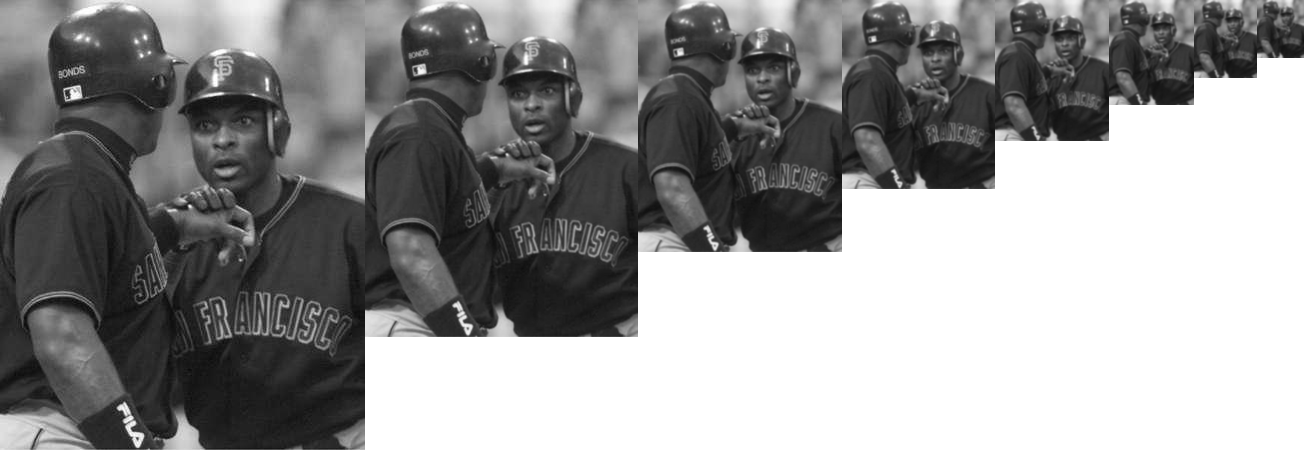

1304

In [4]:
new_image = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/faces/sports.jpg")
pyramid = MakeGaussianPyramid(new_image, 0.75, 75)
ShowGaussianPyramid(pyramid)

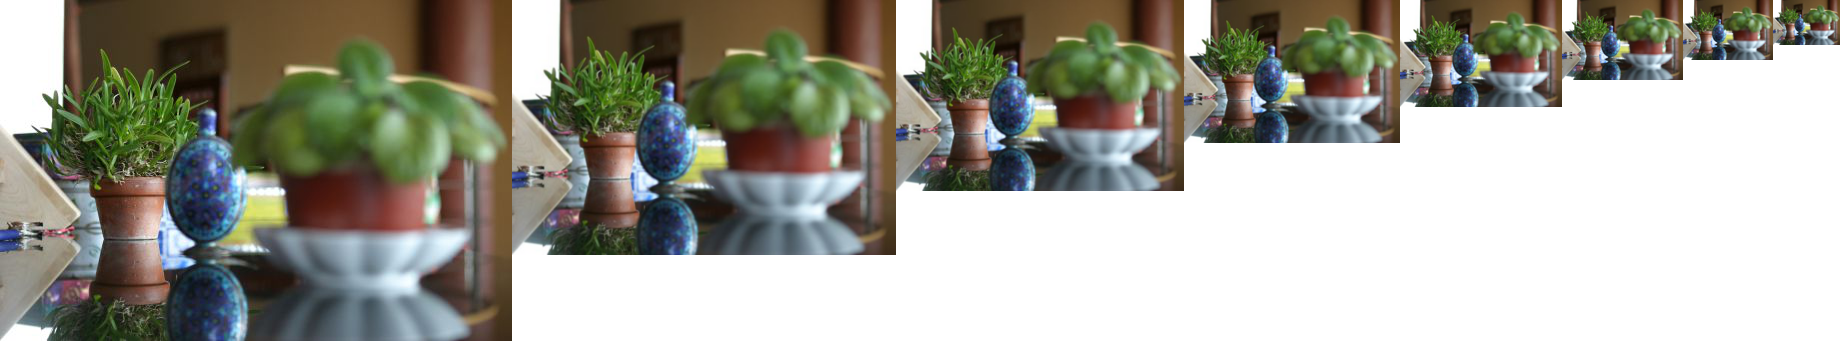

1840

In [5]:
image = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/orchid.jpg")
pyramid1 = MakeGaussianPyramid(image, 0.75, 75)
ShowGaussianPyramid(pyramid1)

In [6]:
# Q4 

def FindTemplate(pyramid, template, threshold):
  return 0

In [7]:
# Part 2
# Q2

def MakeLaplacianPyramid(image, scale, minsize):

  # first convert the image into a gaussian pyramid
  gaussian_pyramid = MakeGaussianPyramid(image, scale, minsize)
  gauss_len = len(gaussian_pyramid)

  # need to perform gaussian filter so get sigma
  sigma = 1/(2*scale)

  # if there is only one image in array then no work to be done, return
  # gaussian array
  if gauss_len <= 1:
    return gaussian_pyramid

  # add gaussian blur to the image and subtract the images, then append to
  # final result
  final_result = []
  for i in range(gauss_len - 1):

    # get current gaussian image
    gauss_arr = gaussian_pyramid[i]

    # 
    gauss_image = Image.fromarray(gauss_arr.astype(np.uint8))
    
    r_image = gauss_image.getchannel("R")
    g_image = gauss_image.getchannel("G")
    b_image = gauss_image.getchannel("B")
    
    r_arr = np.asarray(r_image, dtype = np.float32)
    g_arr = np.asarray(g_image, dtype = np.float32)
    b_arr = np.asarray(b_image, dtype = np.float32)
    
    r_gauss = ndimage.gaussian_filter(r_arr, sigma)
    g_gauss = ndimage.gaussian_filter(g_arr, sigma)
    b_gauss = ndimage.gaussian_filter(b_arr, sigma)
    
    r_gauss_pic = Image.fromarray(r_gauss.astype(np.uint8))
    g_gauss_pic = Image.fromarray(g_gauss.astype(np.uint8))
    b_gauss_pic = Image.fromarray(b_gauss.astype(np.uint8))

    filtered_image = Image.merge("RGB", (r_gauss_pic, g_gauss_pic, b_gauss_pic))
    filtered_image_arr = np.asarray(filtered_image, dtype = np.float32)

    final_arr = np.subtract(gauss_arr, filtered_image_arr)
    final_result.append(final_arr)
  
  # The last of the gaussian array will appended at end
  final_result.append(gaussian_pyramid[-1])

  return final_result

In [8]:
# Q3

def ShowLaplacianPyramid(pyramid):
  pyramid_size = len(pyramid)

  # image height will just be the largest pictures height
  height = pyramid[0].shape[0]

  # image width will be the sum of all widths
  width = 0
  for i in range(pyramid_size):
    width += pyramid[i].shape[1]

  # create new empty image
  image = Image.new(mode = "RGB", size = (width, height), color='white')
  nextX = 0
  
  # for all but last picture add 128, clamp, then paste it into picture
  for i in range(pyramid_size - 1):    
    image_arr = pyramid[i]
        
    image_arr += 128
    np.minimum(255, np.maximum(image_arr, 0))
    
    # paste to blank image
    new_image = Image.fromarray(image_arr.astype(np.uint8))    
    image.paste(new_image, (nextX, 0))
    nextX += new_image.size[0]
  
  # for last image just paste it onto the image
  last_image_arr = pyramid[-1]
  last_image = Image.fromarray(last_image_arr.astype(np.uint8))
  image.paste(last_image, (nextX, 0))

  display(image)

  return pyramid_size

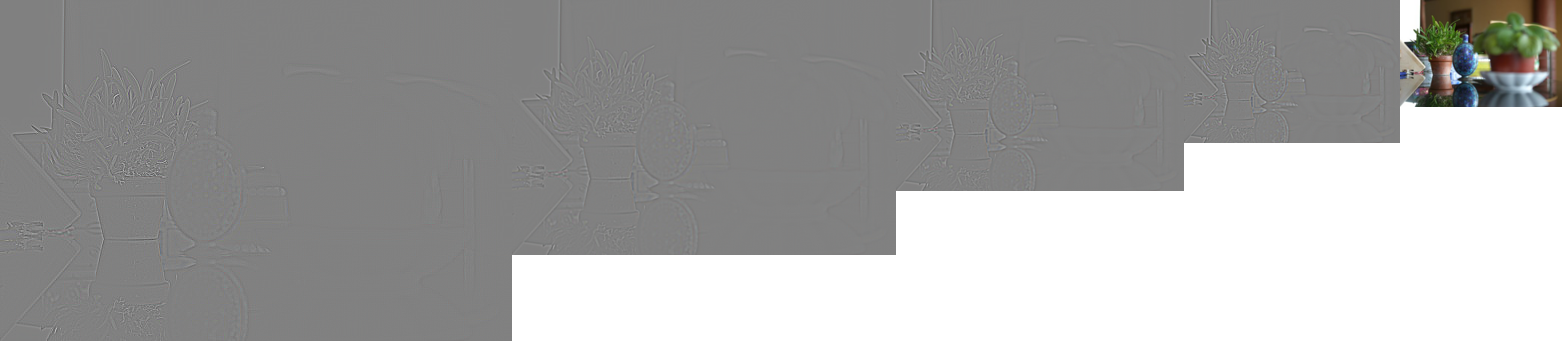

5

In [9]:
image2 = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/orchid.jpg")
pyramid2 = MakeLaplacianPyramid(image2, 0.75, 200)
ShowLaplacianPyramid(pyramid2)

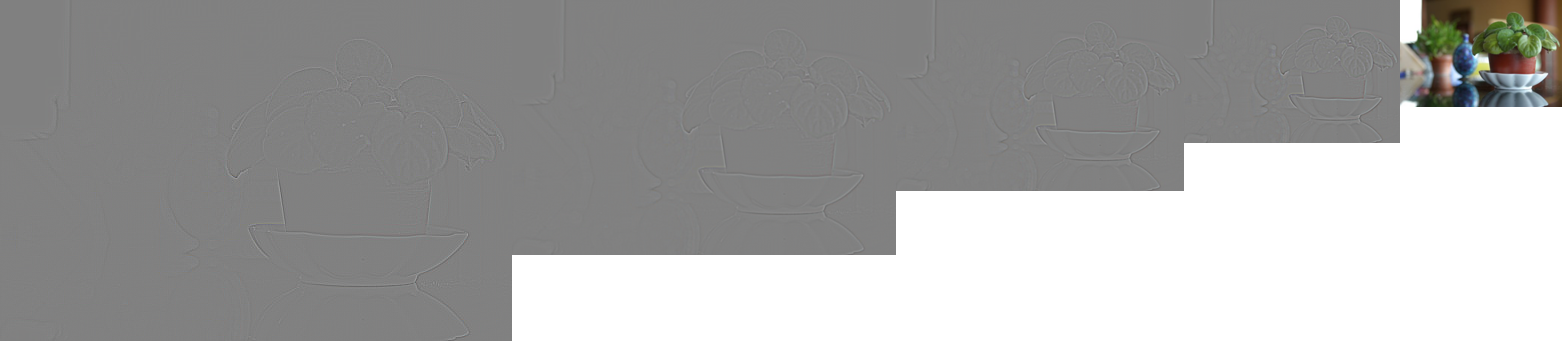

5

In [10]:
image3 = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/violet.jpg")
pyramid3 = MakeLaplacianPyramid(image3, 0.75, 200)
ShowLaplacianPyramid(pyramid3)

In [11]:
# Q4

def ReconstructGaussianFromLaplacianPyramid(lpyramid):
  scale = 0.75
  pyramid_length = len(lpyramid)

  # create a new list and add the last image from the lpyramid to it
  new_gaussian = []
  new_gaussian.append(lpyramid[-1])
  counter = 0
  
  # add every lpyramid to a resized version from the gaussian pyramid one level
  # below, then insert it to the front of list
  for i in range((pyramid_length - 2), -1, -1):
    curr_lvl = lpyramid[i]
    below_lvl_arr = new_gaussian[counter]
    bottom_image = Image.fromarray(below_lvl_arr.astype(np.uint8))
    resize_image = bottom_image.resize((curr_lvl.shape[1], curr_lvl.shape[0]),
                                       Image.BICUBIC)
    resize_image_arr = np.asarray(resize_image, dtype = np.float32)     
    gaussian_image = np.add(resize_image_arr, curr_lvl)
    new_gaussian.insert(0, gaussian_image)
    counter += 1
  
  return new_gaussian

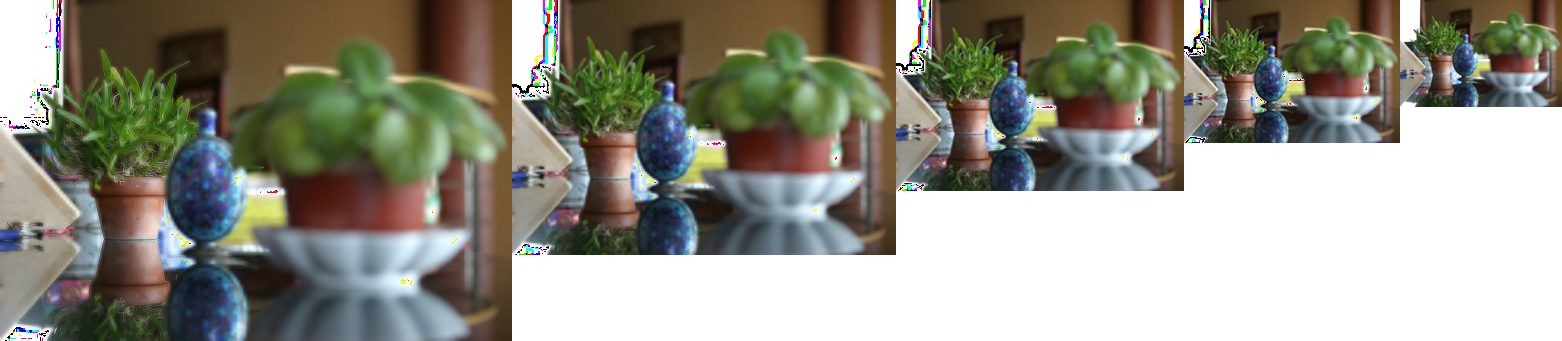

1562

In [12]:
image4 = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/orchid.jpg")
pyramid4 = MakeLaplacianPyramid(image4, 0.75, 200)
new_gaussian = ReconstructGaussianFromLaplacianPyramid(pyramid4)
ShowGaussianPyramid(new_gaussian)

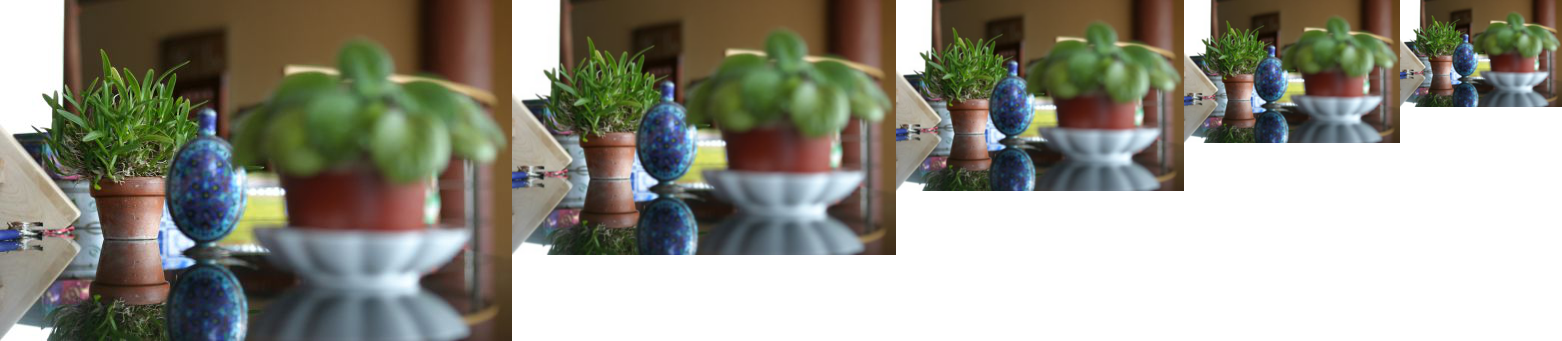

1562

In [13]:
og_gaussian = MakeGaussianPyramid(image4, 0.75, 200)
ShowGaussianPyramid(og_gaussian)

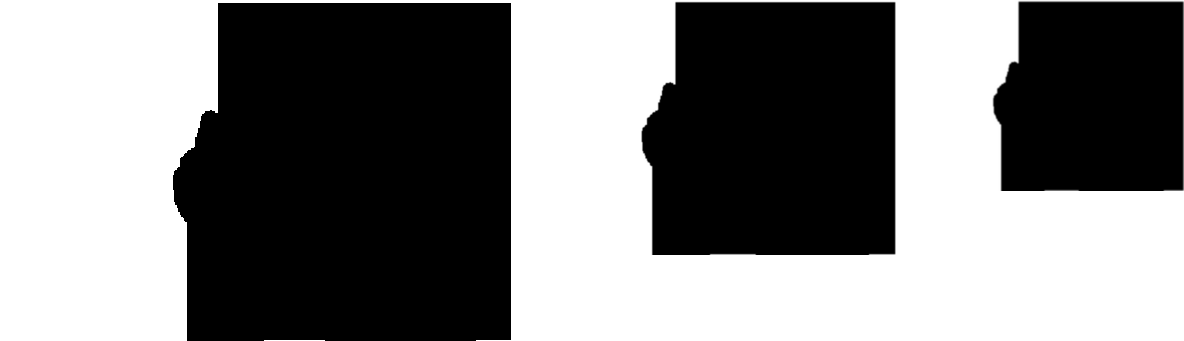

1184

In [14]:
# Q5
image5 = Image.open("/content/drive/MyDrive/CPSC 425/hw2part1/hw2/orchid_mask.bmp")
gauss_pyramid1 = MakeGaussianPyramid(image5, 0.75, 300)
ShowGaussianPyramid(gauss_pyramid1)